In [1]:
import pandas as pd
import numpy as np


customers = pd.read_csv("C:/Users/Akshay G S/OneDrive/Desktop/Uvce Documents/Zeotap/Customers.csv")
products = pd.read_csv("C:/Users/Akshay G S/OneDrive/Desktop/Uvce Documents/Zeotap/Products.csv")
transactions = pd.read_csv("C:/Users/Akshay G S/OneDrive/Desktop/Uvce Documents/Zeotap/Transactions.csv")


In [3]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
print(transactions.describe())


                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


In [11]:
# Most popular products
popular_products = transactions.groupby('ProductID').agg({'Quantity': 'sum'}).reset_index()
popular_products = popular_products.merge(products, on='ProductID').sort_values(by='Quantity', ascending=False)
print(popular_products.head())

   ProductID  Quantity          ProductName     Category   Price
58      P059        46      SoundWave Jeans     Clothing  303.20
53      P054        46   SoundWave Cookbook        Books   57.30
28      P029        45   TechPro Headphones  Electronics  433.64
78      P079        43       ActiveWear Rug   Home Decor  417.37
60      P061        43  HomeSense Desk Lamp   Home Decor  156.96


In [13]:
# Total sales by region
sales_by_region = transactions.groupby(customers['Region']).agg({'TotalValue': 'sum'}).reset_index()
print(sales_by_region)


          Region  TotalValue
0           Asia    21581.55
1         Europe    31194.48
2  North America    28591.98
3  South America    36850.67


In [15]:
# Number of unique customers and products
print(f"Unique Customers: {customers['CustomerID'].nunique()}")
print(f"Unique Products: {products['ProductID'].nunique()}")

Unique Customers: 200
Unique Products: 100


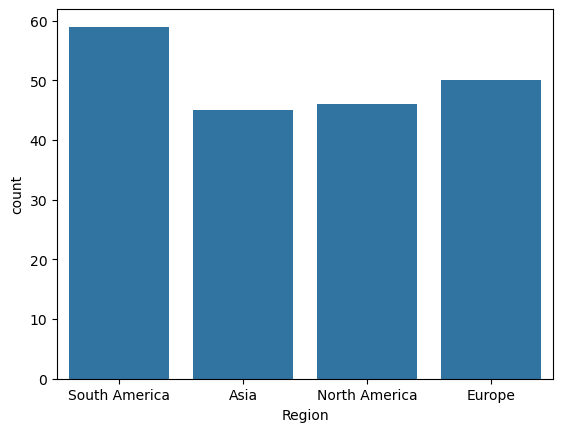

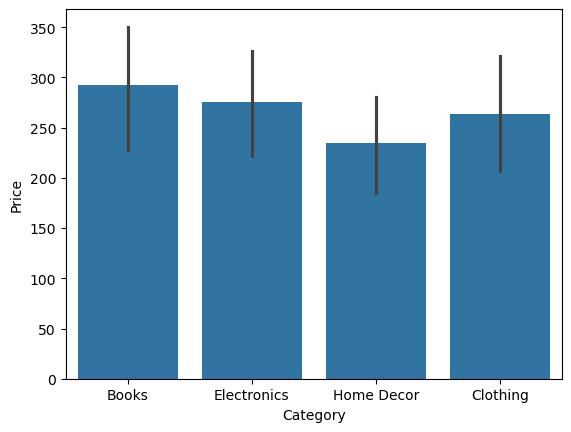

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Region', data=customers)
plt.show()

sns.barplot(x='Category', y='Price', data=products)
plt.show()